# Demo6: 手寫數字辨識

ref: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [11]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### Digital number:
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image

In [1]:
a_list = [1,2,3,4,5,6]
for item in a_list:
    print(item)

1
2
3
4
5
6


In [2]:
b_list = [ [1,10],
          [2,20],
          [3,30],
          [4,40]
         ]
for item in b_list:
    print(item)

[1, 10]
[2, 20]
[3, 30]
[4, 40]


In [5]:
for m, n in b_list:
    print(m, n)

1 10
2 20
3 30
4 40


In [6]:
c_list = [ [1,10,100],
          [2,20,200],
          [3,30,300],
          [4,40,400]
         ]
for item in c_list:
    print(item)

[1, 10, 100]
[2, 20, 200]
[3, 30, 300]
[4, 40, 400]


In [7]:
for m, n, k in c_list:
    print(m, n)

1 10
2 20
3 30
4 40


In [8]:
a1 = [1,2,3,4]
a2 = [10,20,30,40]
for m, n in zip(a1, a2):
    print(m, n)

1 10
2 20
3 30
4 40


In [9]:
for item in zip(a1, a2):
    print(item)

(1, 10)
(2, 20)
(3, 30)
(4, 40)


In [ ]:
# 若不用zip會有點麻煩
d_list = []
for i in range(len(axes)):
    d_list.append([ axes[i], digits.image[i], digits.target[i] ])

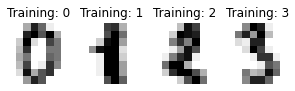

In [12]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(5, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [8]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### 整理資料

In [19]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [20]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)  
#suffle=False:不會特別去將順序打亂，預設為True

### 建立模型

In [21]:
# Create a classifier: a support vector classifier
#clf = svm.SVC(gamma=0.001)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

### 訓練模型

In [22]:
# Learn the digits on the train subset
# clf.fit(X_train, y_train)

kmeans.fit(X_train)

KMeans(n_clusters=10)

## 用模型做預測

In [24]:
y_kmeans = kmeans.predict(X_train)

In [27]:
(y_kmeans - y_train)  #相減不是零，就代表處理的不好

array([ 3,  4,  3, -1,  4,  1, -2,  2, -3, -3,  3,  0, -2, -1,  4,  2, -2,
        2, -3, -3,  3,  0, -2, -1, -3,  2, -2,  2, -3, -3,  3, -3,  2,  2,
       -2,  2,  3, -3, -3, -3, -3,  4,  0,  2,  2, -1,  2,  0,  3,  3,  3,
        3,  2, -3,  3,  3,  0,  3, -2, -1, -1,  2, -1, -1,  4, -2, -2, -2,
        4, -4,  0,  2,  3, -3,  2,  3, -3, -1,  3,  3,  0,  2, -2, -1, -2,
        0,  2,  4, -2, -1,  0, -1, -3,  4,  2, -1, -3,  4, -1,  4,  4,  3,
        2,  4, -2, -3, -2,  0,  2,  2,  4,  4,  2, -2, -3,  3,  3,  2,  2,
       -3,  2,  4, -3, -3,  4, -7,  3, -3, -3, -3,  3,  0, -2, -1,  4,  2,
       -2,  2, -3, -3,  3,  0, -2, -1,  4,  2, -2,  2, -3, -3,  3,  0, -2,
       -1,  4,  2, -2,  2, -3, -3,  3, -3,  2,  2, -2,  2,  3, -3, -3, -3,
       -3,  4,  0,  2,  2, -1,  2,  0,  3,  3, -2, -2,  2, -3, -2,  3,  0,
       -2, -2, -1, -1,  2, -1, -1,  4, -2, -2, -2,  4, -3,  0,  2,  3, -3,
        2,  3, -3, -2,  3,  3,  0,  2, -2, -1, -2,  0,  2, -1,  0, -1, -3,
        0,  2, -2, -3,  4

### 簡單做個驗證

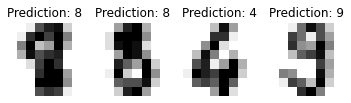

In [28]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### 評估

In [43]:
print("Classification report for classifier ", clf)
print('------------------------------------')
print(metrics.classification_report(y_test, predicted))

Classification report for classifier  SVC(gamma=0.001)
------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [30]:
import sklearn

In [31]:
sklearn.__version__

'0.24.2'